In [1]:
import numpy as np
import deproject, HandShapeAnalysis, h5py
from homography import pyrs12, spaces
import matplotlib.pyplot as plt
import pptk

In [2]:
path_y = "../recording_data/"
path_n = "../recording_data/"
data = !ls "../recording_data/"

In [3]:
data

['1_tap.hdf5',
 '2_tap.hdf5',
 '2_zoomin_yes.hdf5',
 '2_zoomout_yes.hdf5',
 '4_move_left_yes.hdf5',
 '4_move_right_yes.hdf5',
 'backup',
 'labeled',
 '封存.zip']

In [4]:
h5f = h5py.File("../recording_data/"+data[4], 'r')
pcl_center = h5f['pcl_center'][...]
trans_matrix = h5f['trans_matrix'][...]
depth_frame= h5f['depth']

In [33]:
import importlib
importlib.reload(HandShapeAnalysis)

<module 'HandShapeAnalysis' from '/Users/tom/Documents/multi-touch/notebook/HandShapeAnalysis.py'>

In [37]:
analyser = HandShapeAnalysis.Depth2Finger(pcl_center, trans_matrix)
analyser.set_show(debug = False, finger_point_image = True, hull_image = False, 
          detected_defect = False, cluster_point = False, possibility_modal = False)

In [38]:
def renew_both(image):
    hight_area = analyser.renew_high(image)
    hight_point = np.copy(analyser.finger_point_cloud_coordinate)
    
    plt.imshow(analyser.finger_point_image)
    plt.show()
    
    depth_area = analyser.renew_depth(image)
    depth_point = np.copy(analyser.finger_point_cloud_coordinate)
    
    plt.imshow(analyser.finger_point_image)
    plt.show()
    
    new = list()
    for i in range(len(hight_point)):#use bird eye angle as a supplement to camera angle.
        print(hight_point[i])
        
        #is_in_area check whether current hight point are in the square formed by depth_point[:,:2] - 0.02 and depth_point[:,:2] + 0.02
        #and sum the result and check whether there is 2 true, which mean it is close to the circle
        is_in_area = np.sum(((depth_point[:,:2] - 0.02) <= hight_point[i][:2]) & (hight_point[i][:2] <= (depth_point[:,:2] + 0.02))
               ,axis = 1) == 2
        print(is_in_area)
        if np.invert(is_in_area).all():#if the point is not in all of those area
            new.append(hight_point[i])
    print(depth_point)
    print(new)
    print(np.array([*depth_point, *new]))
            
        

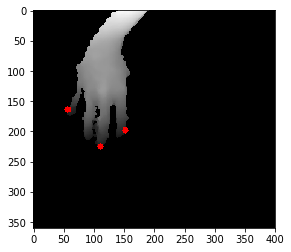

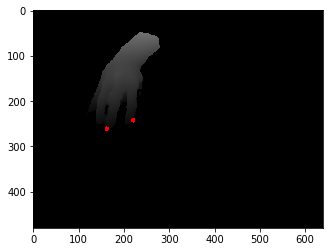

[0.08448586 0.02073387 0.00903825]
[ True False]
[ 0.04795545 -0.00341944  0.00737455]
[False  True]
[0. 0. 0.]
[False False]
[[ 0.08835497  0.02094739  0.0081756 ]
 [ 0.04845072 -0.00233287  0.00821883]]
[array([0., 0., 0.])]
[[ 0.08835497  0.02094739  0.0081756 ]
 [ 0.04845072 -0.00233287  0.00821883]
 [ 0.          0.          0.        ]]


In [39]:
renew_both(depth_frame[36])

0


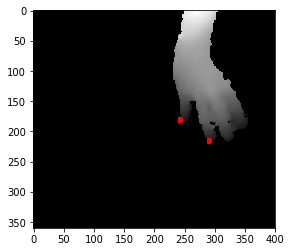

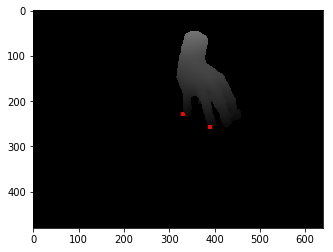

[-0.07836241  0.01262392  0.00970827]
[ True False]
[-0.03463845 -0.01907227  0.01222111]
[False  True]
[[-0.07840297  0.01344401  0.00847964]
 [-0.034662   -0.0175132   0.01046712]]
[]
[[-0.07840297  0.01344401  0.00847964]
 [-0.034662   -0.0175132   0.01046712]]
1


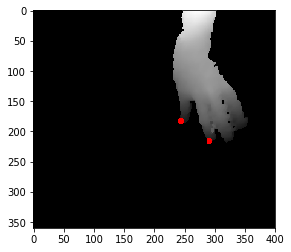

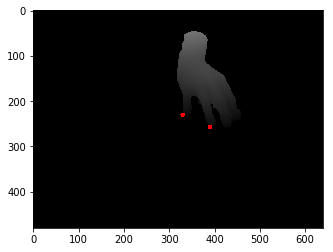

[-0.07838191  0.01252753  0.00962855]
[ True False]
[-0.03621462 -0.01732482  0.01062939]
[False  True]
[[-0.07844201  0.0132519   0.00831938]
 [-0.03466751 -0.01692682  0.00993255]]
[]
[[-0.07844201  0.0132519   0.00831938]
 [-0.03466751 -0.01692682  0.00993255]]
2


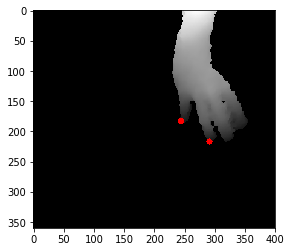

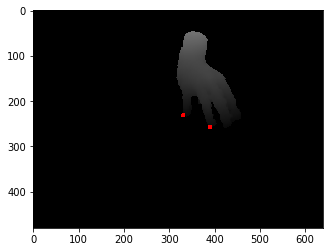

[-0.07838345  0.01354006  0.00855977]
[ True False]
[-0.03621462 -0.01732482  0.01062939]
[False  True]
[[-0.07838345  0.01354006  0.00855977]
 [-0.03545671 -0.01644728  0.00933009]]
[]
[[-0.07838345  0.01354006  0.00855977]
 [-0.03545671 -0.01644728  0.00933009]]
3


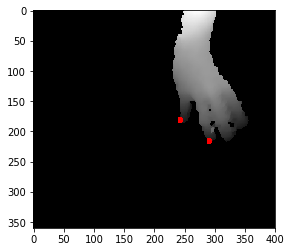

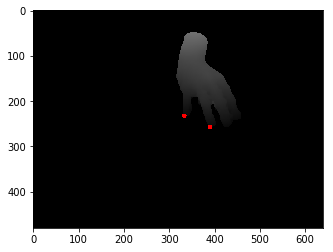

[-0.07840142  0.01243114  0.00954883]
[ True False]
[-0.034642   -0.0191733   0.01214723]
[False  True]
[[-0.07842249  0.01334795  0.00839951]
 [-0.03700879 -0.01557383  0.0090346 ]]
[]
[[-0.07842249  0.01334795  0.00839951]
 [-0.03700879 -0.01557383  0.0090346 ]]
4


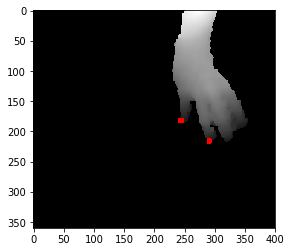

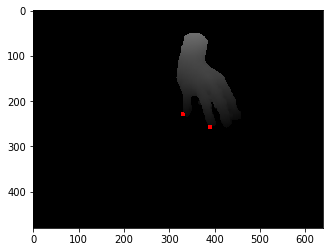

[-0.07836241  0.01262392  0.00970827]
[ True False]
[-0.036226   -0.01831402  0.0108669 ]
[False  True]
[[-0.07842249  0.01334795  0.00839951]
 [-0.03467626 -0.01791531  0.01016917]]
[]
[[-0.07842249  0.01334795  0.00839951]
 [-0.03467626 -0.01791531  0.01016917]]
5


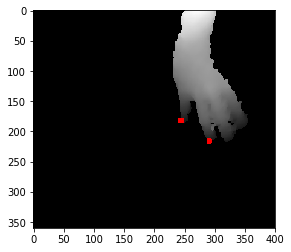

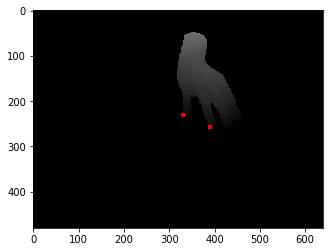

[-0.07836241  0.01262392  0.00970827]
[ True False]
[-0.036226   -0.01831402  0.0108669 ]
[False  True]
[[-0.07844201  0.0132519   0.00831938]
 [-0.03546676 -0.01743498  0.00956572]]
[]
[[-0.07844201  0.0132519   0.00831938]
 [-0.03546676 -0.01743498  0.00956572]]
6


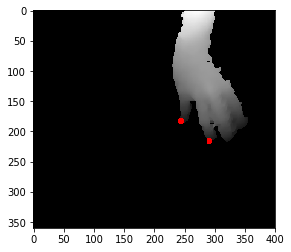

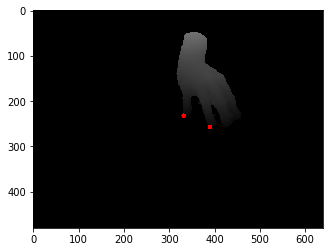

[-0.07840142  0.01243114  0.00954883]
[ True False]
[-0.03621871 -0.01742535  0.0105549 ]
[False  True]
[[-0.07848105  0.01305978  0.00815911]
 [-0.03623779 -0.01576763  0.00887781]]
[]
[[-0.07848105  0.01305978  0.00815911]
 [-0.03623779 -0.01576763  0.00887781]]
7


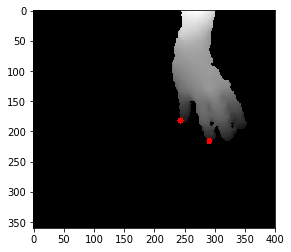

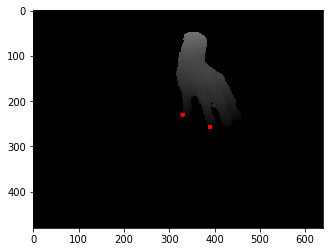

[-0.07840142  0.01243114  0.00954883]
[ True False]
[-0.03464746 -0.01858608  0.01161161]
[False  True]
[[-0.07842249  0.01334795  0.00839951]
 [-0.03466751 -0.01692682  0.00993255]]
[]
[[-0.07842249  0.01334795  0.00839951]
 [-0.03466751 -0.01692682  0.00993255]]
8


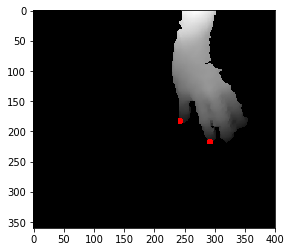

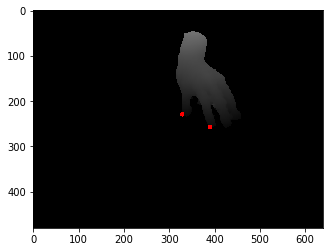

[-0.07914426  0.01343927  0.00848433]
[ True False]
[-0.03466556 -0.01761371  0.01039265]
[False  True]
[[-0.07840297  0.01344401  0.00847964]
 [-0.03388501 -0.01760736  0.010386  ]]
[]
[[-0.07840297  0.01344401  0.00847964]
 [-0.03388501 -0.01760736  0.010386  ]]
9


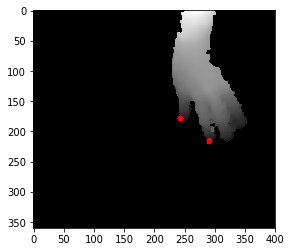

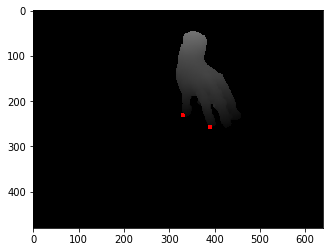

[-0.07840142  0.01243114  0.00954883]
[ True False]
[-0.03462926 -0.0210385   0.01368338]
[False  True]
[[-0.07842249  0.01334795  0.00839951]
 [-0.03466233 -0.01604015  0.0096231 ]]
[]
[[-0.07842249  0.01334795  0.00839951]
 [-0.03466233 -0.01604015  0.0096231 ]]
10


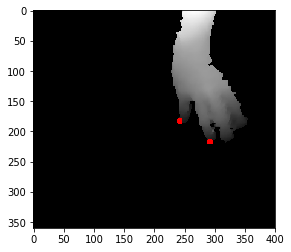

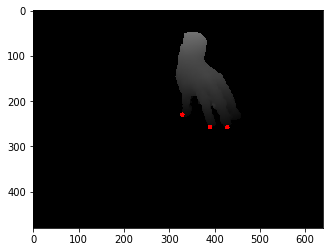

[-0.07914426  0.01343927  0.00848433]
[False  True False]
[-0.03385615 -0.01748938  0.01144118]
[False False  True]
[[-0.10657238  0.01440569  0.00863039]
 [-0.07838345  0.01354006  0.00855977]
 [-0.03386766 -0.01631831  0.0103741 ]]
[]
[[-0.10657238  0.01440569  0.00863039]
 [-0.07838345  0.01354006  0.00855977]
 [-0.03386766 -0.01631831  0.0103741 ]]
11


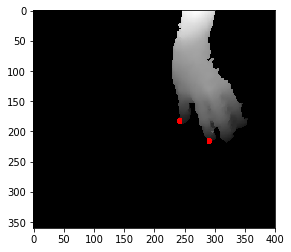

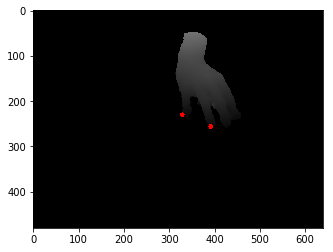

[-0.07847047  0.01260086  0.00873442]
[ True False]
[-0.03383395 -0.01757116  0.01234573]
[False  True]
[[-0.07995538  0.01259129  0.00874394]
 [-0.03385774 -0.0160172   0.0105982 ]]
[]
[[-0.07995538  0.01259129  0.00874394]
 [-0.03385774 -0.0160172   0.0105982 ]]
12


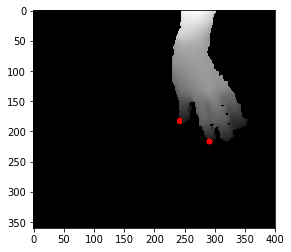

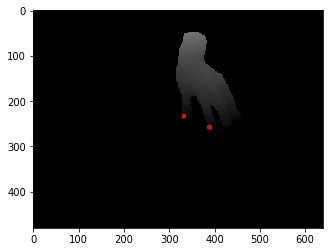

[-0.07840297  0.01344401  0.00847964]
[ True False]
[-0.03385285 -0.01738869  0.01151547]
[False  True]
[[-0.07766192  0.01344876  0.00847492]
 [-0.03622233 -0.01468281  0.00872096]]
[]
[[-0.07766192  0.01344876  0.00847492]
 [-0.03622233 -0.01468281  0.00872096]]
13


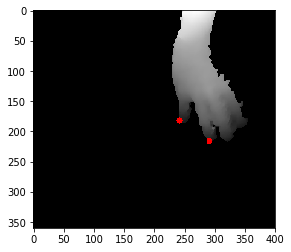

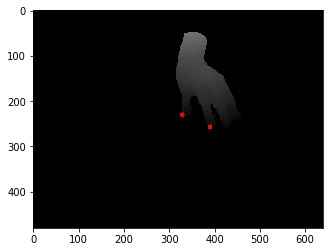

[-0.07840142  0.01243114  0.00954883]
[ True False]
[-0.03384142 -0.0185608   0.01258379]
[False  True]
[[-0.07924318  0.012959    0.00808371]
 [-0.03387426 -0.01651902  0.01022472]]
[]
[[-0.07924318  0.012959    0.00808371]
 [-0.03387426 -0.01651902  0.01022472]]
14


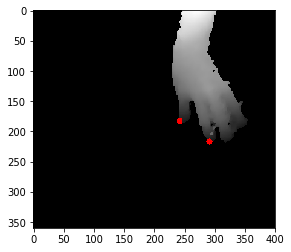

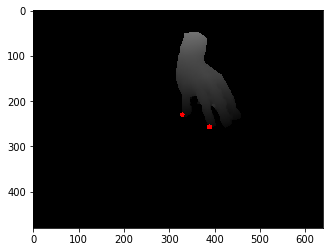

[-0.07838345  0.01354006  0.00855977]
[ True False]
[-0.03384956 -0.01728802  0.01158974]
[False  True]
[[-0.07764266  0.01354482  0.00855506]
 [-0.03386766 -0.01631831  0.0103741 ]]
[]
[[-0.07764266  0.01354482  0.00855506]
 [-0.03386766 -0.01631831  0.0103741 ]]
15


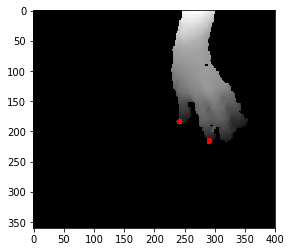

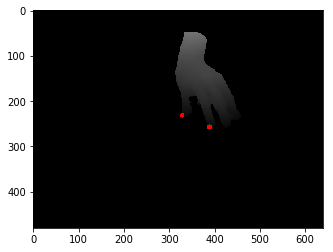

[-0.07836241  0.01262392  0.00970827]
[ True False]
[-0.03384208 -0.0163005   0.01135439]
[False  True]
[[-0.07766192  0.01344876  0.00847492]
 [-0.03386019 -0.01533243  0.01014082]]
[]
[[-0.07766192  0.01344876  0.00847492]
 [-0.03386019 -0.01533243  0.01014082]]
16


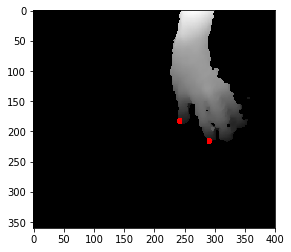

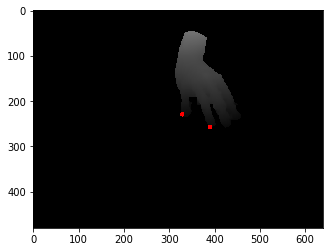

[-0.07840142  0.01243114  0.00954883]
[ True False]
[-0.03382076 -0.01716772  0.01264207]
[False  True]
[[-0.07842249  0.01334795  0.00839951]
 [-0.03383878 -0.01619997  0.01142888]]
[]
[[-0.07842249  0.01334795  0.00839951]
 [-0.03383878 -0.01619997  0.01142888]]
17


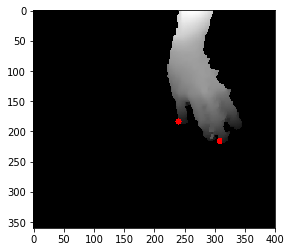

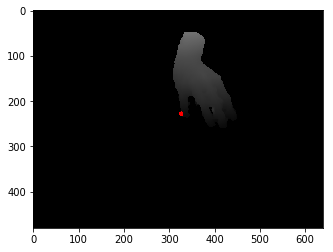

[-0.09356863  0.01260129  0.01271872]
[False]
[-0.03226787 -0.01636914  0.01224508]
[ True]
[[-0.03226787 -0.01636914  0.01224508]]
[array([-0.09356863,  0.01260129,  0.01271872])]
[[-0.03226787 -0.01636914  0.01224508]
 [-0.09356863  0.01260129  0.01271872]]
18


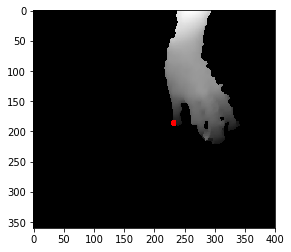

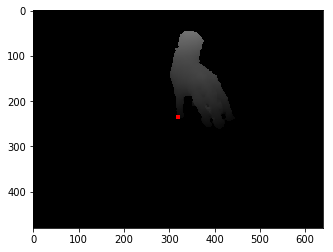

[-0.02530237 -0.01484414  0.01134758]
[ True]
[[-0.02688572 -0.01134954  0.00916977]]
[]
[[-0.02688572 -0.01134954  0.00916977]]
19


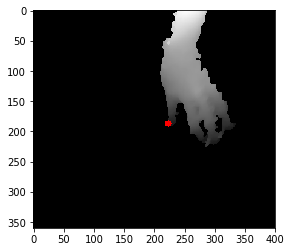

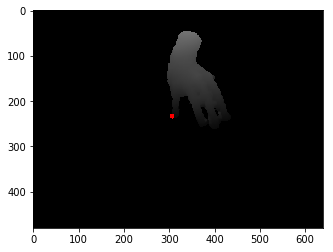

[-0.01681583 -0.01349153  0.01127026]
[ True]
[[-0.01683387 -0.0125293   0.01006401]]
[]
[[-0.01683387 -0.0125293   0.01006401]]
20


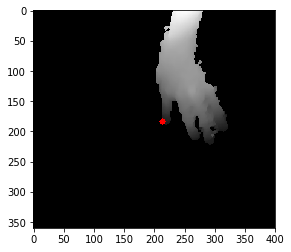

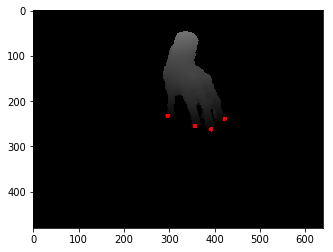

[-0.00899165 -0.01638184  0.01189902]
[False False False  True]
[[-0.08001091  0.01886533  0.00829758]
 [-0.05422974  0.01096036  0.0080245 ]
 [-0.10720728 -0.01034147  0.0071698 ]
 [-0.00906876 -0.01364767  0.01007545]]
[]
[[-0.08001091  0.01886533  0.00829758]
 [-0.05422974  0.01096036  0.0080245 ]
 [-0.10720728 -0.01034147  0.0071698 ]
 [-0.00906876 -0.01364767  0.01007545]]
21


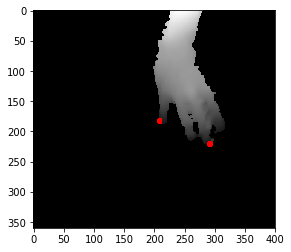

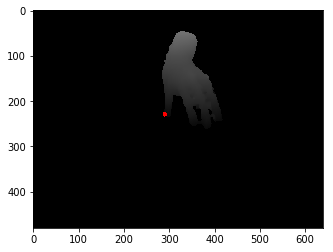

[-0.07904235  0.01750293  0.00519497]
[False]
[-0.00428755 -0.01704858  0.01133917]
[ True]
[[-0.00351152 -0.01665792  0.01065029]]
[array([-0.07904235,  0.01750293,  0.00519497])]
[[-0.00351152 -0.01665792  0.01065029]
 [-0.07904235  0.01750293  0.00519497]]
22


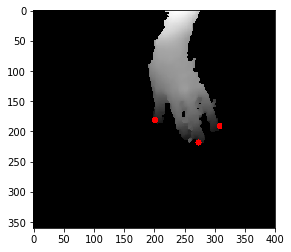

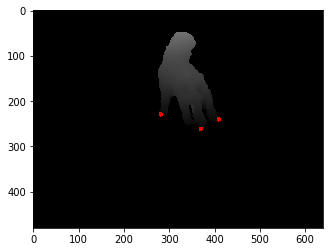

[-0.0625873   0.01455888  0.0111187 ]
[ True False False]
[-0.09361279 -0.01003118  0.00820717]
[False  True False]
[ 0.00278245 -0.01885138  0.01280898]
[False False  True]
[[-0.06326561  0.01804188  0.00835541]
 [-0.09638043 -0.01066484  0.00578877]
 [ 0.00346956 -0.01630018  0.01081504]]
[]
[[-0.06326561  0.01804188  0.00835541]
 [-0.09638043 -0.01066484  0.00578877]
 [ 0.00346956 -0.01630018  0.01081504]]
23


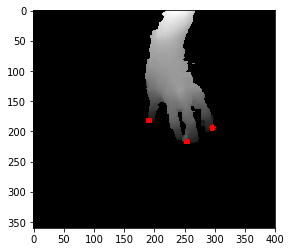

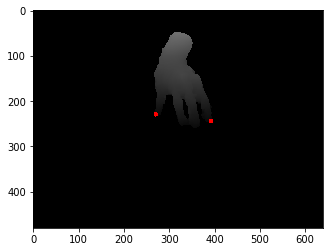

[-0.04480431  0.01337847  0.00220195]
[False False]
[-0.08301004 -0.00681442  0.00860364]
[ True False]
[ 0.0121894  -0.01830901  0.01114234]
[False  True]
[[-0.08161438 -0.00165356  0.00875314]
 [ 0.01214648 -0.01713493  0.01007146]]
[array([-0.04480431,  0.01337847,  0.00220195])]
[[-0.08161438 -0.00165356  0.00875314]
 [ 0.01214648 -0.01713493  0.01007146]
 [-0.04480431  0.01337847  0.00220195]]
24


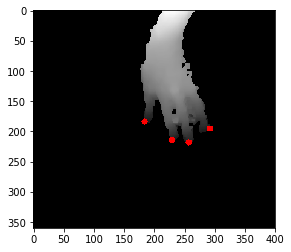

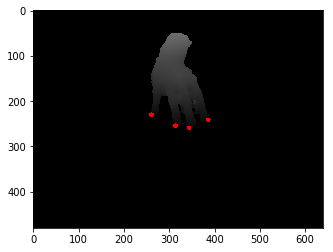

[-0.04732739  0.0144486   0.009879  ]
[ True False False False]
[-0.02251868  0.01079491  0.00648058]
[False  True False False]
[-0.07922271 -0.00670162  0.00766659]
[False False  True False]
[ 0.01831856 -0.0164824   0.01046688]
[False False False  True]
[[-0.04437619  0.01659891  0.00879243]
 [-0.02250169  0.00996998  0.00771523]
 [-0.07736046 -0.00501252  0.00896087]
 [ 0.01906148 -0.01579015  0.01000132]]
[]
[[-0.04437619  0.01659891  0.00879243]
 [-0.02250169  0.00996998  0.00771523]
 [-0.07736046 -0.00501252  0.00896087]
 [ 0.01906148 -0.01579015  0.01000132]]
25


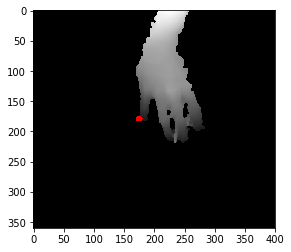

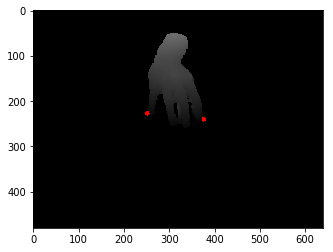

[ 0.02665067 -0.02119188  0.01077039]
[False  True]
[[-0.06989808 -0.00691275  0.00834788]
 [ 0.0266147  -0.02011027  0.00961491]]
[]
[[-0.06989808 -0.00691275  0.00834788]
 [ 0.0266147  -0.02011027  0.00961491]]
26


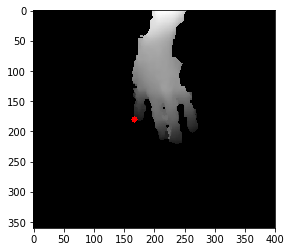

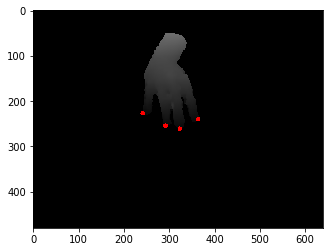

[ 0.03445385 -0.02013525  0.01046143]
[False False False  True]
[[-0.02910732  0.01857265  0.00834885]
 [-0.00631994  0.01106645  0.0083729 ]
 [-0.06058757 -0.00634795  0.00865804]
 [ 0.03442472 -0.01954454  0.0099214 ]]
[]
[[-0.02910732  0.01857265  0.00834885]
 [-0.00631994  0.01106645  0.0083729 ]
 [-0.06058757 -0.00634795  0.00865804]
 [ 0.03442472 -0.01954454  0.0099214 ]]
27


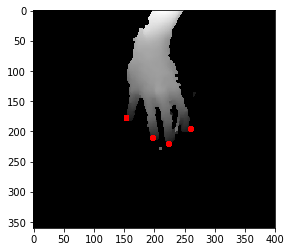

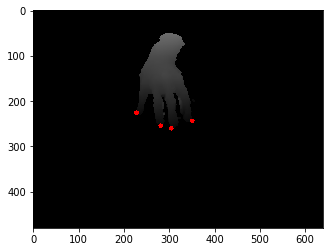

[-0.01751011  0.01766609  0.00930427]
[ True  True False False]
[0.00561272 0.00826413 0.00970029]
[False  True False False]
[0. 0. 0.]
[ True  True False False]
[ 0.04563167 -0.02221481  0.01268604]
[False False False  True]
[[-0.01607394  0.01822477  0.00880681]
 [ 0.001743    0.01152051  0.00861927]
 [-0.05038556 -0.0020893   0.00895078]
 [ 0.04554569 -0.020049    0.01037191]]
[]
[[-0.01607394  0.01822477  0.00880681]
 [ 0.001743    0.01152051  0.00861927]
 [-0.05038556 -0.0020893   0.00895078]
 [ 0.04554569 -0.020049    0.01037191]]
28


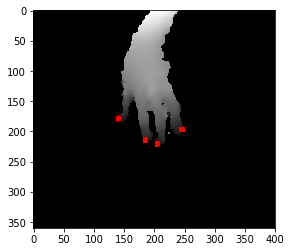

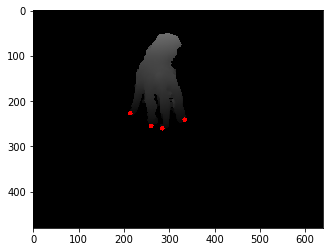

[-0.00081596  0.01732787  0.0087537 ]
[ True  True False False]
[0.01795122 0.01084187 0.00969766]
[ True  True False False]
[-0.03770822 -0.00438668  0.00403224]
[False False  True False]
[ 0.05736814 -0.02043466  0.01187772]
[False False False  True]
[[-0.00156598  0.01796483  0.00835499]
 [ 0.01719835  0.01175257  0.00855476]
 [-0.03782004 -0.01012827  0.00441237]
 [ 0.05627145 -0.0179625   0.01078191]]
[]
[[-0.00156598  0.01796483  0.00835499]
 [ 0.01719835  0.01175257  0.00855476]
 [-0.03782004 -0.01012827  0.00441237]
 [ 0.05627145 -0.0179625   0.01078191]]
29


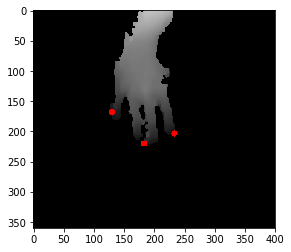

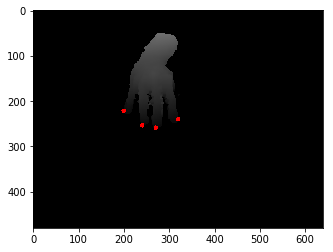

[0.01932755 0.01614391 0.05217733]
[ True  True False False]
[-0.02616459  0.00068775  0.00791622]
[False False  True False]
[0. 0. 0.]
[ True False False False]
[[ 0.00935346  0.01741719  0.00865879]
 [ 0.03148636  0.01026489  0.0080376 ]
 [-0.02694087 -0.00993311  0.00538899]
 [ 0.06821647 -0.02325423  0.01262337]]
[]
[[ 0.00935346  0.01741719  0.00865879]
 [ 0.03148636  0.01026489  0.0080376 ]
 [-0.02694087 -0.00993311  0.00538899]
 [ 0.06821647 -0.02325423  0.01262337]]
30


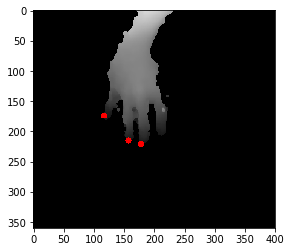

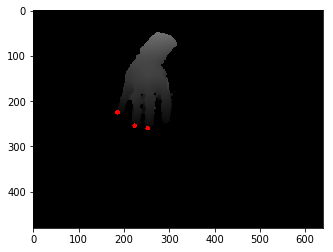

[0.02389153 0.01728857 0.00924544]
[ True  True False]
[0.04312792 0.01153335 0.00887307]
[False  True False]
[ 0.07925411 -0.02561337  0.01760432]
[False False  True]
[[ 0.02165733  0.01836453  0.00829392]
 [ 0.04386548  0.01200054  0.00828865]
 [ 0.07937646 -0.02089173  0.01028206]]
[]
[[ 0.02165733  0.01836453  0.00829392]
 [ 0.04386548  0.01200054  0.00828865]
 [ 0.07937646 -0.02089173  0.01028206]]
31


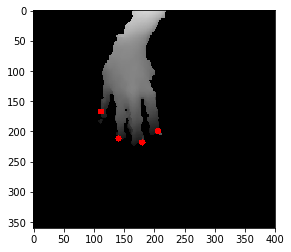

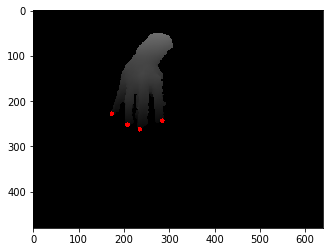

[0.02263537 0.01486633 0.00044994]
[ True False False False]
[0.05771625 0.00902952 0.00942971]
[False  True False False]
[-0.00112702 -0.00275744  0.0086679 ]
[False False  True False]
[ 0.08383585 -0.03179037  0.01813713]
[False False False  True]
[[ 0.03433189  0.02138987  0.00873331]
 [ 0.05625452  0.00974817  0.0081254 ]
 [-0.00044282 -0.00149347  0.00868862]
 [ 0.0886855  -0.01611591  0.01072699]]
[]
[[ 0.03433189  0.02138987  0.00873331]
 [ 0.05625452  0.00974817  0.0081254 ]
 [-0.00044282 -0.00149347  0.00868862]
 [ 0.0886855  -0.01611591  0.01072699]]
32


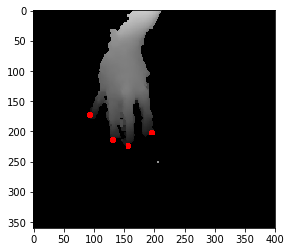

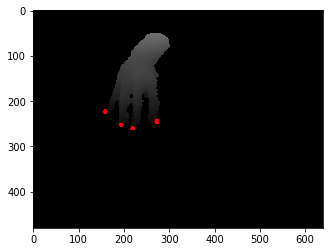

[0.04321945 0.02000548 0.00928063]
[ True False False False]
[0.06565916 0.01063664 0.00963398]
[False  True False False]
[ 0.00783331 -0.00018753  0.00766695]
[False False  True False]
[0. 0. 0.]
[False False  True False]
[[ 0.0453353   0.02031317  0.00949996]
 [ 0.06640659  0.01110624  0.00904656]
 [ 0.0084649   0.00089453  0.00851711]
 [ 0.1009571  -0.02061293  0.01217431]]
[]
[[ 0.0453353   0.02031317  0.00949996]
 [ 0.06640659  0.01110624  0.00904656]
 [ 0.0084649   0.00089453  0.00851711]
 [ 0.1009571  -0.02061293  0.01217431]]
33


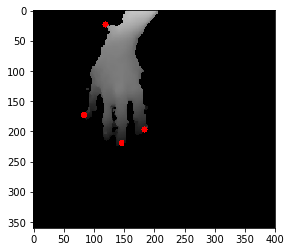

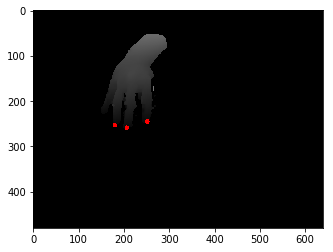

[0.0528871  0.01531665 0.00895895]
[ True False False]
[ 0.01846845 -0.00413635  0.00140661]
[False False  True]
[ 0.10959172 -0.02669635  0.01460168]
[False False False]
[ 0.07770585 -0.16349874  0.07034842]
[False False False]
[[0.05626088 0.01777448 0.00808908]
 [0.07692181 0.01186888 0.00850914]
 [0.0242214  0.00161729 0.00884052]]
[array([ 0.10959172, -0.02669635,  0.01460168]), array([ 0.07770585, -0.16349874,  0.07034842])]
[[ 0.05626088  0.01777448  0.00808908]
 [ 0.07692181  0.01186888  0.00850914]
 [ 0.0242214   0.00161729  0.00884052]
 [ 0.10959172 -0.02669635  0.01460168]
 [ 0.07770585 -0.16349874  0.07034842]]
34


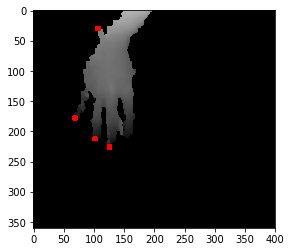

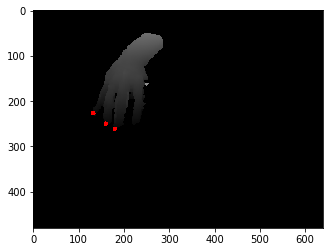

[0.07166848 0.02206776 0.00373554]
[ True False False]
[0.09259212 0.00883277 0.01053691]
[ True  True False]
[ 0.12341523 -0.02166259  0.01312678]
[False False  True]
[0. 0. 0.]
[False False False]
[[ 0.07507134  0.02031951  0.00793784]
 [ 0.09249648  0.00995823  0.00952688]
 [ 0.12033087 -0.01254344  0.01392096]]
[array([0., 0., 0.])]
[[ 0.07507134  0.02031951  0.00793784]
 [ 0.09249648  0.00995823  0.00952688]
 [ 0.12033087 -0.01254344  0.01392096]
 [ 0.          0.          0.        ]]
35


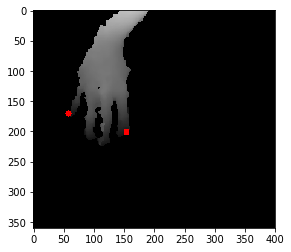

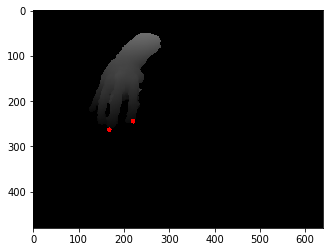

[ 0.0456666  -0.00087316  0.00357723]
[False  True]
[0. 0. 0.]
[False False]
[[0.08108385 0.028424   0.01282626]
 [0.04793199 0.00057321 0.00858513]]
[array([0., 0., 0.])]
[[0.08108385 0.028424   0.01282626]
 [0.04793199 0.00057321 0.00858513]
 [0.         0.         0.        ]]
36


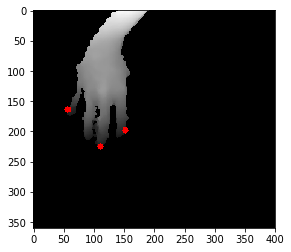

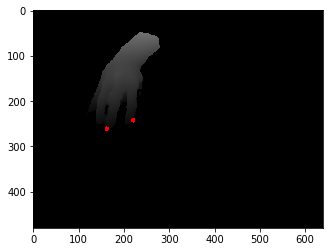

[0.08448586 0.02073387 0.00903825]
[ True False]
[ 0.04795545 -0.00341944  0.00737455]
[False  True]
[0. 0. 0.]
[False False]
[[ 0.08835497  0.02094739  0.0081756 ]
 [ 0.04845072 -0.00233287  0.00821883]]
[array([0., 0., 0.])]
[[ 0.08835497  0.02094739  0.0081756 ]
 [ 0.04845072 -0.00233287  0.00821883]
 [ 0.          0.          0.        ]]
37


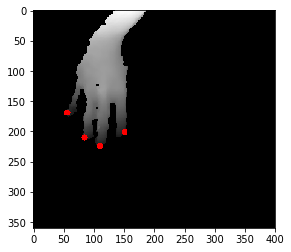

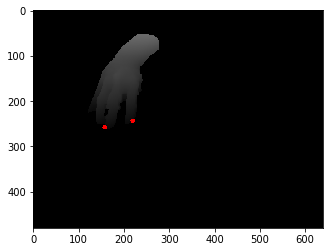

[0.08622596 0.02018075 0.00853153]
[ True False]
[0.10863572 0.00724423 0.0137582 ]
[ True False]
[ 0.04900872 -0.00106736  0.00823741]
[False  True]
[ 0.13456164 -0.02983632  0.01316612]
[False False]
[[ 0.09146485  0.01942364  0.00968992]
 [ 0.04900872 -0.00106736  0.00823741]]
[array([ 0.13456164, -0.02983632,  0.01316612])]
[[ 0.09146485  0.01942364  0.00968992]
 [ 0.04900872 -0.00106736  0.00823741]
 [ 0.13456164 -0.02983632  0.01316612]]
38


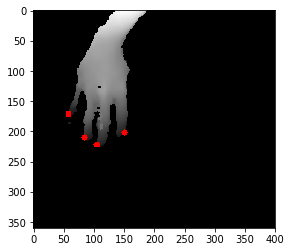

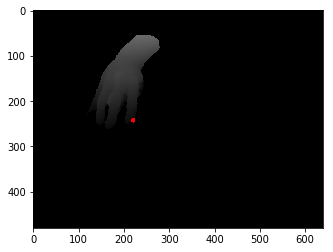

[0.09004968 0.01830308 0.01069122]
[False]
[0.10831056 0.00746284 0.01488715]
[False]
[ 0.04887384 -0.00010473  0.00803302]
[ True]
[ 0.13265115 -0.02801383  0.01147976]
[False]
[[ 0.04850101 -0.00252917  0.00806402]]
[array([0.09004968, 0.01830308, 0.01069122]), array([0.10831056, 0.00746284, 0.01488715]), array([ 0.13265115, -0.02801383,  0.01147976])]
[[ 0.04850101 -0.00252917  0.00806402]
 [ 0.09004968  0.01830308  0.01069122]
 [ 0.10831056  0.00746284  0.01488715]
 [ 0.13265115 -0.02801383  0.01147976]]
39


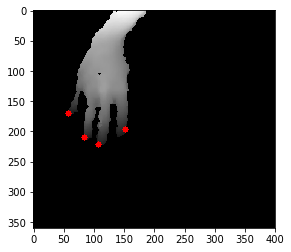

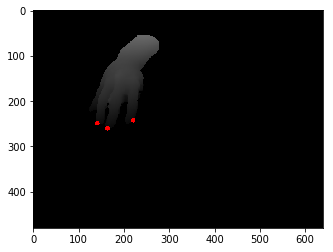

[0.08794789 0.01835223 0.00982408]
[ True  True False]
[0.10817242 0.00748858 0.01204757]
[False  True False]
[ 0.04755307 -0.00489872  0.00622067]
[False False  True]
[ 0.13272928 -0.029132    0.01268109]
[False False False]
[[ 0.08701818  0.0200943   0.00844071]
 [ 0.10731925  0.00945026  0.00978754]
 [ 0.04855133 -0.0027255   0.00790919]]
[array([ 0.13272928, -0.029132  ,  0.01268109])]
[[ 0.08701818  0.0200943   0.00844071]
 [ 0.10731925  0.00945026  0.00978754]
 [ 0.04855133 -0.0027255   0.00790919]
 [ 0.13272928 -0.029132    0.01268109]]
40


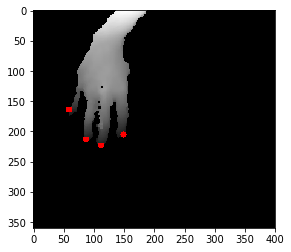

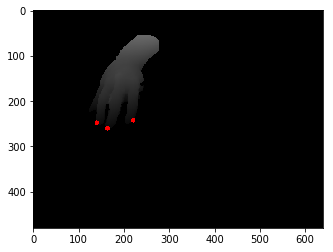

[0.08398318 0.01924391 0.00970215]
[ True False False]
[0.10630572 0.00992612 0.01019183]
[ True  True False]
[0.05048375 0.00292786 0.00944728]
[False False  True]
[ 0.13248508 -0.03497768  0.01459503]
[False False False]
[[ 0.08689667  0.0203794   0.00868465]
 [ 0.10787047  0.00947504  0.01075992]
 [ 0.04847587 -0.00243101  0.00814144]]
[array([ 0.13248508, -0.03497768,  0.01459503])]
[[ 0.08689667  0.0203794   0.00868465]
 [ 0.10787047  0.00947504  0.01075992]
 [ 0.04847587 -0.00243101  0.00814144]
 [ 0.13248508 -0.03497768  0.01459503]]
41


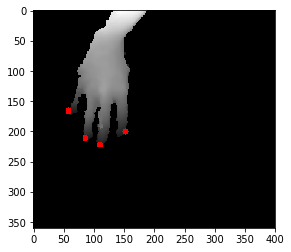

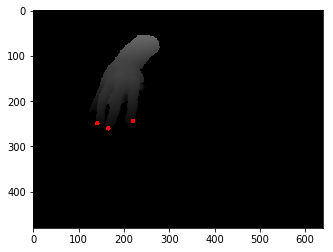

[0.08557411 0.01815784 0.01066527]
[ True False False]
[0.1072908  0.00814359 0.01162601]
[False  True False]
[ 0.04774053 -0.00168381  0.00680251]
[False False  True]
[ 0.13285547 -0.03302191  0.01394851]
[False False False]
[[0.08539481 0.02036226 0.00870362]
 [0.10727236 0.00954706 0.00986663]
 [0.0487976  0.00018874 0.00826649]]
[array([ 0.13285547, -0.03302191,  0.01394851])]
[[ 0.08539481  0.02036226  0.00870362]
 [ 0.10727236  0.00954706  0.00986663]
 [ 0.0487976   0.00018874  0.00826649]
 [ 0.13285547 -0.03302191  0.01394851]]
42


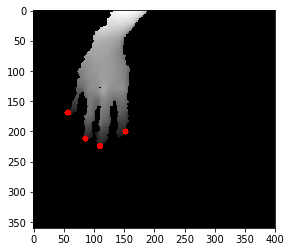

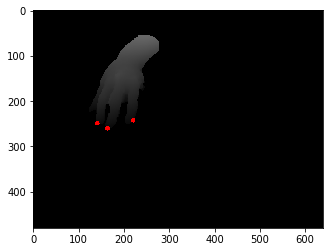

[0.08539946 0.01990678 0.0092746 ]
[ True False False]
[0.10719069 0.00880562 0.01119692]
[False  True False]
[ 0.04786493 -0.00217297  0.0064134 ]
[False False  True]
[0. 0. 0.]
[False False False]
[[ 0.08697768  0.02018933  0.00852203]
 [ 0.10722548  0.00964383  0.0099457 ]
 [ 0.04845072 -0.00233287  0.00821883]]
[array([0., 0., 0.])]
[[ 0.08697768  0.02018933  0.00852203]
 [ 0.10722548  0.00964383  0.0099457 ]
 [ 0.04845072 -0.00233287  0.00821883]
 [ 0.          0.          0.        ]]
43


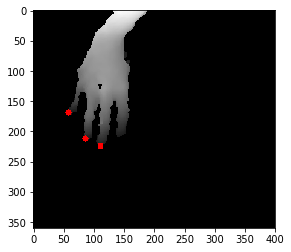

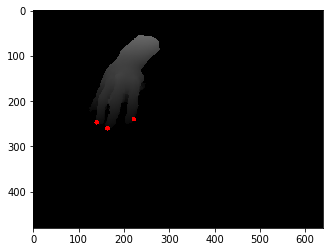

[0.08472863 0.01970792 0.00912174]
[ True False False]
[0.10727832 0.00907921 0.01045313]
[False  True False]
[ 0.1330016  -0.03015237  0.01295814]
[False False False]
[[ 0.08705869  0.01999927  0.0083594 ]
 [ 0.10811244  0.00852216  0.01095232]
 [ 0.04812102 -0.00496326  0.0081071 ]]
[array([ 0.1330016 , -0.03015237,  0.01295814])]
[[ 0.08705869  0.01999927  0.0083594 ]
 [ 0.10811244  0.00852216  0.01095232]
 [ 0.04812102 -0.00496326  0.0081071 ]
 [ 0.1330016  -0.03015237  0.01295814]]
44


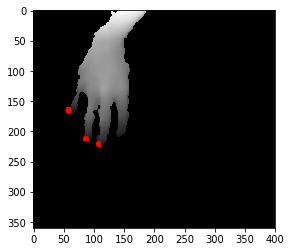

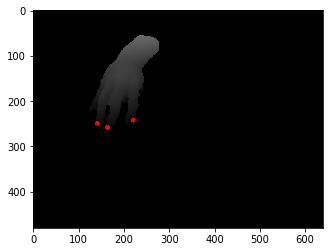

[0.08744252 0.01731304 0.00992291]
[ True  True False]
[0.1064515  0.00916815 0.01054071]
[ True  True False]
[0. 0. 0.]
[False False False]
[[ 0.08731107  0.0185145   0.00901806]
 [ 0.10727236  0.00954706  0.00986663]
 [ 0.04845072 -0.00233287  0.00821883]]
[array([0., 0., 0.])]
[[ 0.08731107  0.0185145   0.00901806]
 [ 0.10727236  0.00954706  0.00986663]
 [ 0.04845072 -0.00233287  0.00821883]
 [ 0.          0.          0.        ]]
45


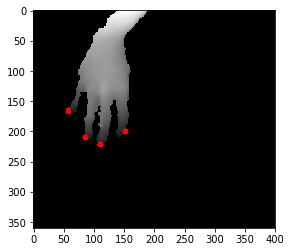

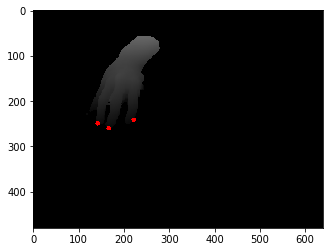

[0.08481779 0.01860555 0.01010276]
[ True False False]
[0.10757864 0.00709105 0.01174286]
[False  True False]
[ 0.04781517 -0.00197732  0.00656903]
[False False  True]
[ 0.13289273 -0.03261352  0.01323612]
[False False False]
[[ 0.08464456  0.02035372  0.00871306]
 [ 0.10663193  0.00924855  0.00963822]
 [ 0.04801331 -0.00409254  0.00781741]]
[array([ 0.13289273, -0.03261352,  0.01323612])]
[[ 0.08464456  0.02035372  0.00871306]
 [ 0.10663193  0.00924855  0.00963822]
 [ 0.04801331 -0.00409254  0.00781741]
 [ 0.13289273 -0.03261352  0.01323612]]
46


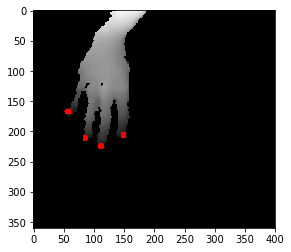

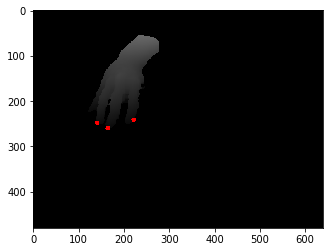

[0.08393892 0.0197947  0.00921214]
[ True False False]
[0.10747201 0.00822286 0.01072489]
[False  True False]
[0.05037139 0.0037864  0.00917285]
[False False  True]
[0. 0. 0.]
[False False False]
[[ 0.0862662   0.02008571  0.00845022]
 [ 0.10741897  0.00878832  0.01021648]
 [ 0.04798841 -0.00399421  0.00789462]]
[array([0., 0., 0.])]
[[ 0.0862662   0.02008571  0.00845022]
 [ 0.10741897  0.00878832  0.01021648]
 [ 0.04798841 -0.00399421  0.00789462]
 [ 0.          0.          0.        ]]
47


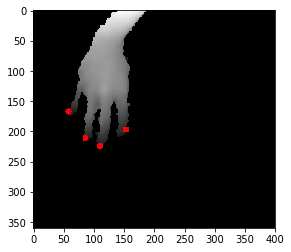

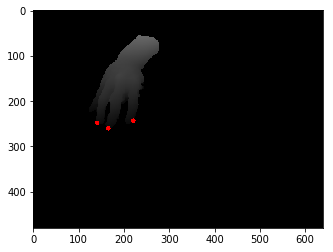

[0.08539946 0.01990678 0.0092746 ]
[ True False False]
[0.10738458 0.007949   0.01146908]
[False  True False]
[0. 0. 0.]
[False False False]
[0. 0. 0.]
[False False False]
[[ 0.08539481  0.02036226  0.00870362]
 [ 0.10737209  0.00888528  0.01029536]
 [ 0.04839247 -0.00166216  0.00777898]]
[array([0., 0., 0.]), array([0., 0., 0.])]
[[ 0.08539481  0.02036226  0.00870362]
 [ 0.10737209  0.00888528  0.01029536]
 [ 0.04839247 -0.00166216  0.00777898]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
48


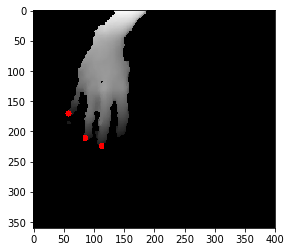

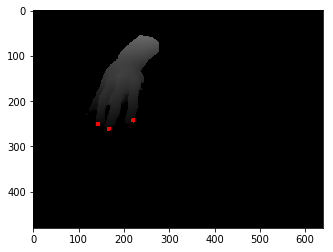

[0.08315022 0.01988151 0.0093025 ]
[ True False False]
[0.10733771 0.0080463  0.01154754]
[False  True False]
[ 0.13262576 -0.02892744  0.01282551]
[False False False]
[[ 0.08452101  0.02109377  0.00838664]
 [ 0.10574732  0.01036975  0.00863226]
 [ 0.04850101 -0.00252917  0.00806402]]
[array([ 0.13262576, -0.02892744,  0.01282551])]
[[ 0.08452101  0.02109377  0.00838664]
 [ 0.10574732  0.01036975  0.00863226]
 [ 0.04850101 -0.00252917  0.00806402]
 [ 0.13262576 -0.02892744  0.01282551]]
49


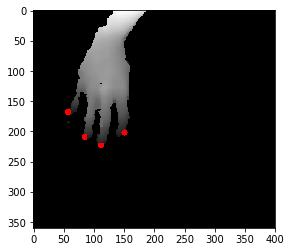

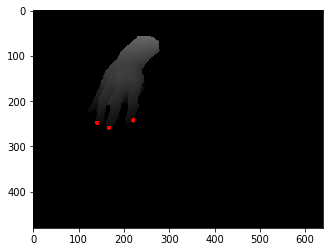

[0.08414081 0.01886243 0.00937864]
[ True False False]
[0.10850929 0.00633703 0.01208816]
[False  True False]
[ 0.04889925 -0.00020256  0.00795519]
[False False  True]
[ 0.13397765 -0.03086242  0.01344885]
[False False False]
[[ 0.08484768  0.0194223   0.00887845]
 [ 0.10765337  0.00830352  0.00982208]
 [ 0.04850101 -0.00252917  0.00806402]]
[array([ 0.13397765, -0.03086242,  0.01344885])]
[[ 0.08484768  0.0194223   0.00887845]
 [ 0.10765337  0.00830352  0.00982208]
 [ 0.04850101 -0.00252917  0.00806402]
 [ 0.13397765 -0.03086242  0.01344885]]
50


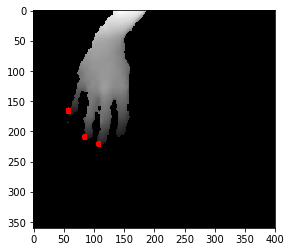

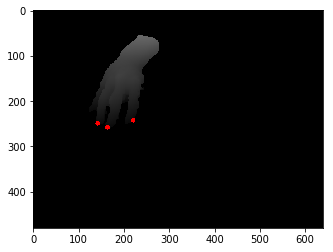

[0.08744252 0.01731304 0.00992291]
[ True  True False]
[0.10842182 0.00606329 0.01283219]
[False  True False]
[0. 0. 0.]
[False False False]
[[ 0.08731107  0.0185145   0.00901806]
 [ 0.10672514  0.00905495  0.00948004]
 [ 0.04847587 -0.00243101  0.00814144]]
[array([0., 0., 0.])]
[[ 0.08731107  0.0185145   0.00901806]
 [ 0.10672514  0.00905495  0.00948004]
 [ 0.04847587 -0.00243101  0.00814144]
 [ 0.          0.          0.        ]]
51


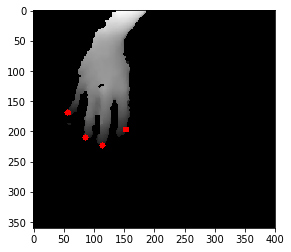

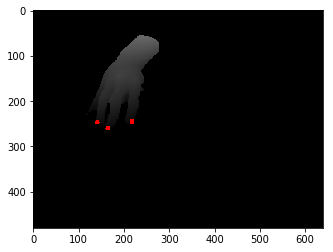

[0.08256175 0.01903653 0.00955872]
[ True False False]
[0.10775968 0.00717065 0.01084138]
[False  True False]
[ 0.04685903 -0.00433921  0.00471613]
[False False  True]
[ 0.13380769 -0.03004556  0.01302612]
[False False False]
[[0.0862662  0.02008571 0.00845022]
 [0.10780021 0.00754298 0.01017419]
 [0.04993159 0.00213968 0.00883033]]
[array([ 0.13380769, -0.03004556,  0.01302612])]
[[ 0.0862662   0.02008571  0.00845022]
 [ 0.10780021  0.00754298  0.01017419]
 [ 0.04993159  0.00213968  0.00883033]
 [ 0.13380769 -0.03004556  0.01302612]]
52


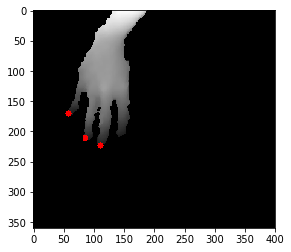

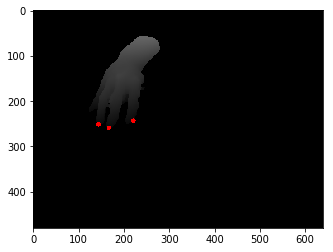

[0.08481282 0.0190615  0.00953119]
[ True False False]
[0.10743148 0.0078517  0.01139062]
[False  True False]
[ 0.13272928 -0.029132    0.01268109]
[False False False]
[[ 0.08480801  0.01951751  0.00895955]
 [ 0.10501401  0.01026498  0.00856186]
 [ 0.04826673 -0.00117219  0.00816707]]
[array([ 0.13272928, -0.029132  ,  0.01268109])]
[[ 0.08480801  0.01951751  0.00895955]
 [ 0.10501401  0.01026498  0.00856186]
 [ 0.04826673 -0.00117219  0.00816707]
 [ 0.13272928 -0.029132    0.01268109]]
53


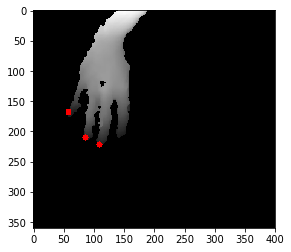

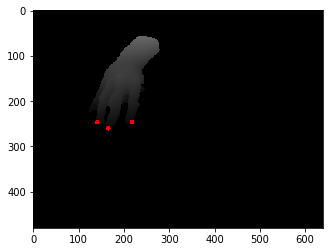

[0. 0. 0.]
[False False False]
[0.10757864 0.00709105 0.01174286]
[False  True False]
[ 0.13308114 -0.03127329  0.01416292]
[False False False]
[[0.08543476 0.02026722 0.00862231]
 [0.10756578 0.0080286  0.01056754]
 [0.04974244 0.00329199 0.00878906]]
[array([0., 0., 0.]), array([ 0.13308114, -0.03127329,  0.01416292])]
[[ 0.08543476  0.02026722  0.00862231]
 [ 0.10756578  0.0080286   0.01056754]
 [ 0.04974244  0.00329199  0.00878906]
 [ 0.          0.          0.        ]
 [ 0.13308114 -0.03127329  0.01416292]]
54


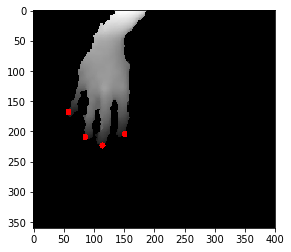

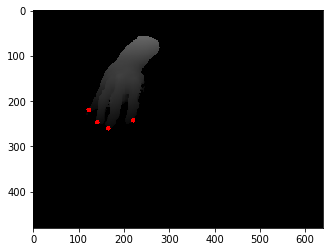

[0.08252288 0.01913191 0.00963959]
[ True False False False]
[0.10767911 0.00642707 0.0121744 ]
[False  True False False]
[0.04864769 0.00209202 0.00688285]
[False False  True False]
[0. 0. 0.]
[False False False False]
[[ 0.08543476  0.02026722  0.00862231]
 [ 0.10765954  0.00783437  0.01041021]
 [ 0.04847587 -0.00243101  0.00814144]
 [ 0.13307843 -0.02668685  0.01142106]]
[array([0., 0., 0.])]
[[ 0.08543476  0.02026722  0.00862231]
 [ 0.10765954  0.00783437  0.01041021]
 [ 0.04847587 -0.00243101  0.00814144]
 [ 0.13307843 -0.02668685  0.01142106]
 [ 0.          0.          0.        ]]
55


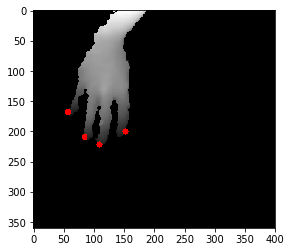

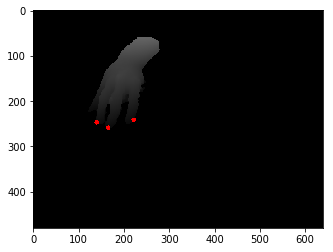

[0.08652189 0.01814448 0.00968109]
[ True False False]
[0.10842182 0.00606329 0.01283219]
[False  True False]
[ 0.04780737 -0.00150163  0.0059727 ]
[False False  True]
[0. 0. 0.]
[False False False]
[[ 0.08567917  0.01924037  0.00870693]
 [ 0.10834826  0.00803652  0.01055893]
 [ 0.04801331 -0.00409254  0.00781741]]
[array([0., 0., 0.])]
[[ 0.08567917  0.01924037  0.00870693]
 [ 0.10834826  0.00803652  0.01055893]
 [ 0.04801331 -0.00409254  0.00781741]
 [ 0.          0.          0.        ]]
56


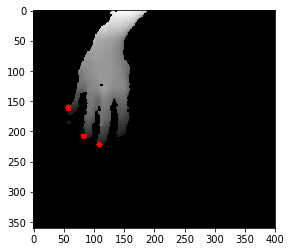

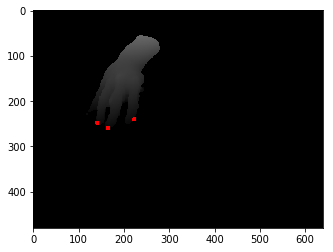

[0.08651698 0.01860144 0.00910825]
[ True False False]
[0.10935455 0.0053078  0.01317927]
[False  True False]
[0. 0. 0.]
[False False False]
[[ 0.08631106  0.01953444  0.00894084]
 [ 0.10774715  0.0081096   0.00966431]
 [ 0.04754477 -0.00575792  0.00749825]]
[array([0., 0., 0.])]
[[ 0.08631106  0.01953444  0.00894084]
 [ 0.10774715  0.0081096   0.00966431]
 [ 0.04754477 -0.00575792  0.00749825]
 [ 0.          0.          0.        ]]
57


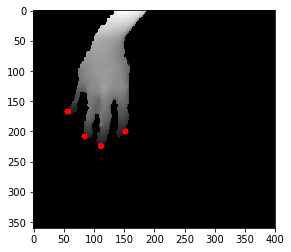

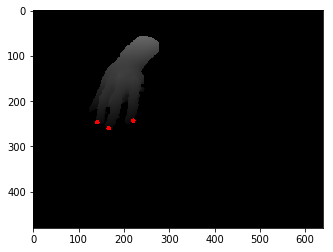

[0.0838207  0.02008031 0.00945539]
[ True False False]
[0.10861758 0.00520246 0.01310957]
[False  True False]
[ 0.04779029 -0.00187948  0.00664686]
[False False  True]
[ 0.13430402 -0.03198864  0.01365818]
[False False False]
[[ 0.08456521  0.02054379  0.00887565]
 [ 0.10780021  0.00754298  0.01017419]
 [ 0.04834218 -0.00146616  0.00793422]]
[array([ 0.13430402, -0.03198864,  0.01365818])]
[[ 0.08456521  0.02054379  0.00887565]
 [ 0.10780021  0.00754298  0.01017419]
 [ 0.04834218 -0.00146616  0.00793422]
 [ 0.13430402 -0.03198864  0.01365818]]
58


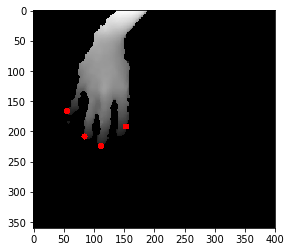

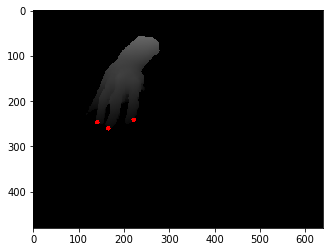

[0.08393892 0.0197947  0.00921214]
[ True False False]
[0.10847606 0.00549635 0.01334246]
[False  True False]
[ 0.04681389 -0.00912031  0.00489484]
[False False  True]
[0. 0. 0.]
[False False False]
[[ 0.08543476  0.02026722  0.00862231]
 [ 0.10765954  0.00783437  0.01041021]
 [ 0.04798841 -0.00399421  0.00789462]]
[array([0., 0., 0.])]
[[ 0.08543476  0.02026722  0.00862231]
 [ 0.10765954  0.00783437  0.01041021]
 [ 0.04798841 -0.00399421  0.00789462]
 [ 0.          0.          0.        ]]
59


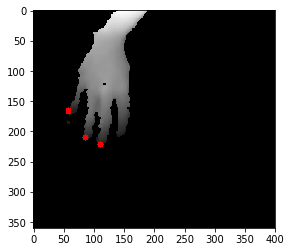

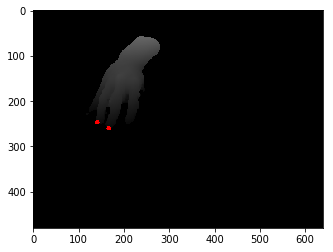

[0.08485749 0.01851001 0.01002208]
[ True False]
[0.1077128  0.00726794 0.01091985]
[False  True]
[0. 0. 0.]
[False False]
[[0.08476362 0.0200686  0.00846915]
 [0.10775331 0.00764011 0.01025287]]
[array([0., 0., 0.])]
[[0.08476362 0.0200686  0.00846915]
 [0.10775331 0.00764011 0.01025287]
 [0.         0.         0.        ]]
60


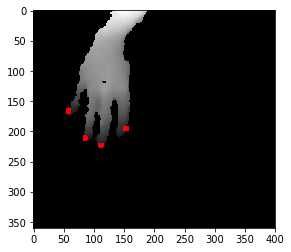

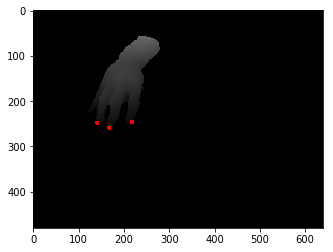

[0.084062   0.01905316 0.00954039]
[ True False False]
[0.10733771 0.0080463  0.01154754]
[False  True False]
[ 0.04705369 -0.006466    0.005979  ]
[False False  True]
[ 0.13275249 -0.03281601  0.01409126]
[False False False]
[[0.08405717 0.01950907 0.00896886]
 [0.10727832 0.00907921 0.01045313]
 [0.04984621 0.00290202 0.00847608]]
[array([ 0.13275249, -0.03281601,  0.01409126])]
[[ 0.08405717  0.01950907  0.00896886]
 [ 0.10727832  0.00907921  0.01045313]
 [ 0.04984621  0.00290202  0.00847608]
 [ 0.13275249 -0.03281601  0.01409126]]
61


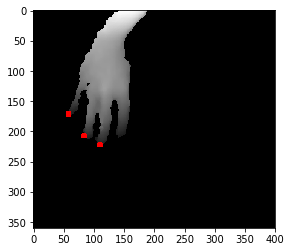

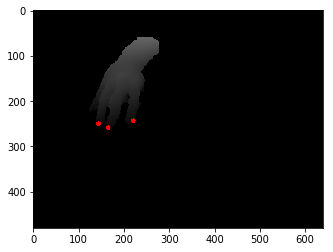

[0.08588377 0.01830692 0.00887485]
[ True  True False]
[0.10918698 0.00429297 0.01525316]
[False  True False]
[ 0.13266423 -0.02852176  0.01211651]
[False False False]
[[ 0.085839    0.01885955  0.00838253]
 [ 0.10529593  0.00921725  0.00867271]
 [ 0.04834218 -0.00146616  0.00793422]]
[array([ 0.13266423, -0.02852176,  0.01211651])]
[[ 0.085839    0.01885955  0.00838253]
 [ 0.10529593  0.00921725  0.00867271]
 [ 0.04834218 -0.00146616  0.00793422]
 [ 0.13266423 -0.02852176  0.01211651]]
62


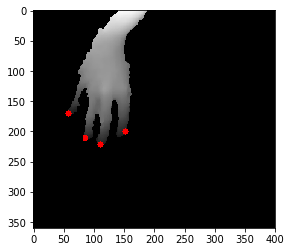

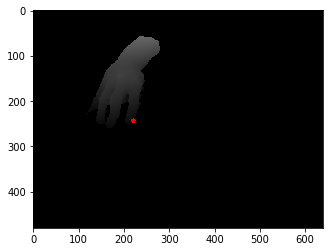

[0.08490225 0.01795826 0.01051336]
[False]
[0.10751889 0.00812573 0.01064622]
[False]
[ 0.04771566 -0.00158597  0.00688033]
[ True]
[ 0.13302648 -0.0292365   0.01160957]
[False]
[[ 0.04826673 -0.00117219  0.00816707]]
[array([0.08490225, 0.01795826, 0.01051336]), array([0.10751889, 0.00812573, 0.01064622]), array([ 0.13302648, -0.0292365 ,  0.01160957])]
[[ 0.04826673 -0.00117219  0.00816707]
 [ 0.08490225  0.01795826  0.01051336]
 [ 0.10751889  0.00812573  0.01064622]
 [ 0.13302648 -0.0292365   0.01160957]]
63


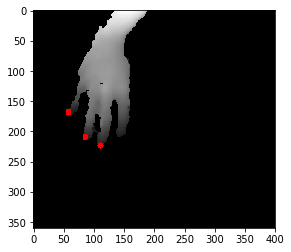

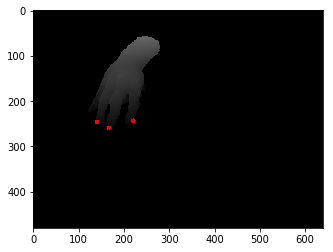

[0.08489219 0.01887078 0.00936943]
[ True False False]
[0.10763911 0.00605582 0.01284024]
[False  True False]
[ 0.1329776  -0.03106772  0.01430608]
[False False False]
[[ 0.08484768  0.0194223   0.00887845]
 [ 0.10757214  0.00755981  0.01115522]
 [ 0.04834218 -0.00146616  0.00793422]]
[array([ 0.1329776 , -0.03106772,  0.01430608])]
[[ 0.08484768  0.0194223   0.00887845]
 [ 0.10757214  0.00755981  0.01115522]
 [ 0.04834218 -0.00146616  0.00793422]
 [ 0.1329776  -0.03106772  0.01430608]]
64


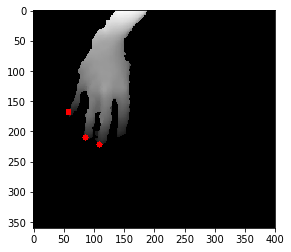

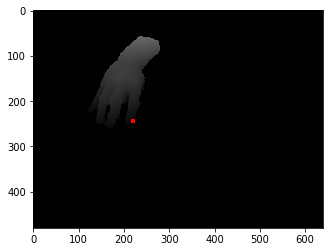

[0.08651698 0.01860144 0.00910825]
[False]
[0.10757864 0.00709105 0.01174286]
[False]
[ 0.13327418 -0.03117446  0.01323736]
[False]
[[0.04874677 0.00038441 0.00842215]]
[array([0.08651698, 0.01860144, 0.00910825]), array([0.10757864, 0.00709105, 0.01174286]), array([ 0.13327418, -0.03117446,  0.01323736])]
[[ 0.04874677  0.00038441  0.00842215]
 [ 0.08651698  0.01860144  0.00910825]
 [ 0.10757864  0.00709105  0.01174286]
 [ 0.13327418 -0.03117446  0.01323736]]
65


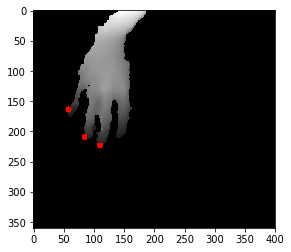

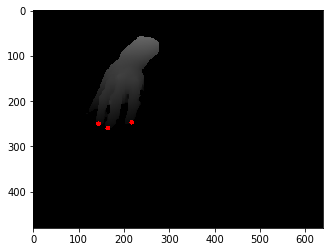

[0.0854891  0.01880491 0.01025501]
[ True  True False]
[0.10837466 0.00616106 0.01291001]
[False  True False]
[0. 0. 0.]
[False False False]
[[0.0862662  0.02008571 0.00845022]
 [0.10520385 0.0094105  0.00883127]
 [0.05025914 0.00464367 0.00890005]]
[array([0., 0., 0.])]
[[0.0862662  0.02008571 0.00845022]
 [0.10520385 0.0094105  0.00883127]
 [0.05025914 0.00464367 0.00890005]
 [0.         0.         0.        ]]
66


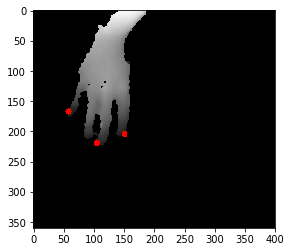

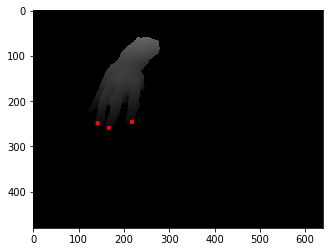

[0.08993176 0.01548341 0.01121809]
[ True  True False]
[0.048579   0.00191312 0.00770854]
[False False  True]
[ 0.13330247 -0.03219436  0.01451592]
[False False False]
[[0.08460958 0.01999355 0.00936502]
 [0.10667854 0.00915175 0.00955913]
 [0.04911109 0.00279757 0.00840528]]
[array([ 0.13330247, -0.03219436,  0.01451592])]
[[ 0.08460958  0.01999355  0.00936502]
 [ 0.10667854  0.00915175  0.00955913]
 [ 0.04911109  0.00279757  0.00840528]
 [ 0.13330247 -0.03219436  0.01451592]]
67


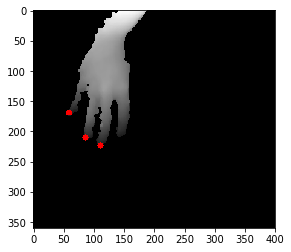

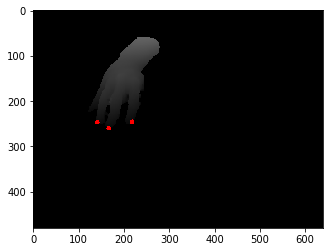

[0.08489219 0.01887078 0.00936943]
[ True False False]
[0.10748485 0.00728597 0.01189938]
[False  True False]
[ 0.13233662 -0.03005698  0.01203545]
[False False False]
[[0.08488266 0.01978349 0.00822526]
 [0.10751889 0.00812573 0.01064622]
 [0.04916245 0.00260257 0.00824879]]
[array([ 0.13233662, -0.03005698,  0.01203545])]
[[ 0.08488266  0.01978349  0.00822526]
 [ 0.10751889  0.00812573  0.01064622]
 [ 0.04916245  0.00260257  0.00824879]
 [ 0.13233662 -0.03005698  0.01203545]]
68


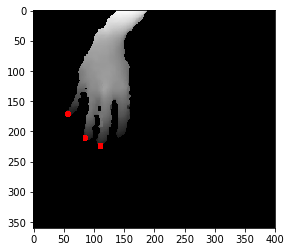

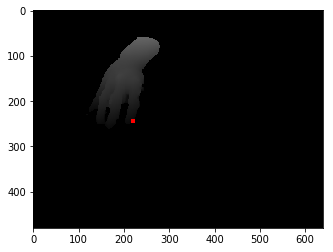

[0.08464925 0.01989834 0.00928393]
[False]
[0.10747201 0.00822286 0.01072489]
[False]
[ 0.13361154 -0.02821291  0.01132996]
[False]
[[0.04877219 0.00028657 0.00834432]]
[array([0.08464925, 0.01989834, 0.00928393]), array([0.10747201, 0.00822286, 0.01072489]), array([ 0.13361154, -0.02821291,  0.01132996])]
[[ 0.04877219  0.00028657  0.00834432]
 [ 0.08464925  0.01989834  0.00928393]
 [ 0.10747201  0.00822286  0.01072489]
 [ 0.13361154 -0.02821291  0.01132996]]


In [21]:
a = 0
for i in depth_frame:
    print(a)
    a+=1
    renew_both(i)